# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from pprint import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key 
# from config import owm_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

city_weather_df = pd.DataFrame()
# set up additional columns to hold information
city_weather_df['city'] = ""
city_weather_df['country'] = ""
city_weather_df['lat'] = ""
city_weather_df['lng'] = ""
city_weather_df['temp'] = ""
city_weather_df['humi'] = ""
city_weather_df['cloud'] = ""
city_weather_df['wspeed'] = ""


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    if city not in cities:
        cities.append(city)
        city_weather_df.loc[len(cities), 'city'] = city
        city_weather_df.loc[len(cities), 'lat'] = lat_lng[0]
        city_weather_df.loc[len(cities), 'lng'] = lat_lng[1]

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
##### Created two different Countdown conters but not sure why noe of them worked, These work fine as stand alone

def countdown1(interval):
    while interval:
        mins, secs = divmod(interval, 60)
        timeformat = '{:02d}:{02d}'.format(mins, secs)
        print(timeformat, end='\r')
        time.sleep(1)
        interval -= 1
        
def countdown2(interval):
    msg = "Seconds Passed: "
    for i in range(pause):
        sys.stdout.write("\r{} {}seconds ".format(msg, i))
        time.sleep(1)
        sys.stdout.flush()

In [21]:
# Save config information.

settings = {"units": "imperial", "appid": api_key}

for index, row in city_weather_df.iterrows():
    try:
#         print("Index = " + str(index) + ", index % 10 =" + str(index % 10))
        if (index % 60 == 0):  # todo make it 59 per min for final ver (index > 0) & 
            pause = 60
            print("-"*25)
            print('Pause for ' + str(pause) + ' seconds before next API call.')
            print("-"*25)
            time.sleep(pause)
#             countdown2 (pause)

        print("Processing Record " + str(index) + " of " + str(len(cities)) + " for City " + str(row[0]))
        current_weather = owm.get_current(row['city'], **settings)

        summary = ["name", "main.temp", "main.humidity", "wind.speed", "clouds.all", "sys.country"]
        data = current_weather(*summary)

        city_weather_df.loc[index, 'country'] = data[5]
        city_weather_df.loc[index, 'temp'] = data[1]
        city_weather_df.loc[index, 'humi'] = data[2]
        city_weather_df.loc[index, 'cloud'] = data[3]
        city_weather_df.loc[index, 'wspeed'] = data[4]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping: " + row[0])
    except:
        print("Http/Name Error... skipping city: " + row[0])
        

Processing Record 1 of 615 for City Aklavik
Processing Record 2 of 615 for City Severo-kurilsk
Processing Record 3 of 615 for City Esperance
Processing Record 4 of 615 for City Mataura
Processing Record 5 of 615 for City Rikitea
Processing Record 6 of 615 for City Bonavista
Processing Record 7 of 615 for City Kavieng
Processing Record 8 of 615 for City Prudnik
Processing Record 9 of 615 for City Jamestown
Processing Record 10 of 615 for City Muzhi
Processing Record 11 of 615 for City Bluff
Processing Record 12 of 615 for City Butaritari
Processing Record 13 of 615 for City Mount gambier
Processing Record 14 of 615 for City Diamantina
Processing Record 15 of 615 for City Saskylakh
Processing Record 16 of 615 for City Toliary
Http/Name Error... skipping city: Toliary
Processing Record 17 of 615 for City San ramon
Processing Record 18 of 615 for City Yellowknife
Processing Record 19 of 615 for City Thompson
Processing Record 20 of 615 for City Victoria
Processing Record 21 of 615 for City

Processing Record 157 of 615 for City Russell
Processing Record 158 of 615 for City Waingapu
Processing Record 159 of 615 for City Barra patuca
Processing Record 160 of 615 for City Bismarck
Processing Record 161 of 615 for City Nizhneyansk
Http/Name Error... skipping city: Nizhneyansk
Processing Record 162 of 615 for City Umzimvubu
Http/Name Error... skipping city: Umzimvubu
Processing Record 163 of 615 for City Saleaula
Http/Name Error... skipping city: Saleaula
Processing Record 164 of 615 for City Aquiraz
Processing Record 165 of 615 for City Praia da vitoria
Processing Record 166 of 615 for City Pitkyaranta
Processing Record 167 of 615 for City Freeport
Processing Record 168 of 615 for City East london
Processing Record 169 of 615 for City Narsaq
Processing Record 170 of 615 for City Upernavik
Processing Record 171 of 615 for City Illoqqortoormiut
Http/Name Error... skipping city: Illoqqortoormiut
Processing Record 172 of 615 for City Port keats
Processing Record 173 of 615 for Ci

Http/Name Error... skipping city: Kapustin yar-1
Processing Record 309 of 615 for City Sinegorye
Processing Record 310 of 615 for City Maarianhamina
Http/Name Error... skipping city: Maarianhamina
Processing Record 311 of 615 for City Caconda
Processing Record 312 of 615 for City Egvekinot
Processing Record 313 of 615 for City Beverly hills
Processing Record 314 of 615 for City Kizema
Processing Record 315 of 615 for City Formoso do araguaia
Http/Name Error... skipping city: Formoso do araguaia
Processing Record 316 of 615 for City State college
Processing Record 317 of 615 for City Mirabela
Processing Record 318 of 615 for City Hoquiam
Processing Record 319 of 615 for City Anadyr
Processing Record 320 of 615 for City Atyrau
Processing Record 321 of 615 for City Guadalupe y calvo
Processing Record 322 of 615 for City Katsuura
Processing Record 323 of 615 for City Linguere
Http/Name Error... skipping city: Linguere
Processing Record 324 of 615 for City Fuling
Processing Record 325 of 61

Processing Record 468 of 615 for City Richards bay
Processing Record 469 of 615 for City Luwuk
Processing Record 470 of 615 for City Fort frances
Processing Record 471 of 615 for City Grand-lahou
Processing Record 472 of 615 for City Quatre cocos
Processing Record 473 of 615 for City Beloha
Processing Record 474 of 615 for City Swan hill
Processing Record 475 of 615 for City Kitakata
Processing Record 476 of 615 for City Centralia
Processing Record 477 of 615 for City Winter haven
Processing Record 478 of 615 for City Asayita
Http/Name Error... skipping city: Asayita
Processing Record 479 of 615 for City Lorengau
-------------------------
Pause for 60 seconds before next API call.
-------------------------
Processing Record 480 of 615 for City Bugasong
Processing Record 481 of 615 for City Bargal
Http/Name Error... skipping city: Bargal
Processing Record 482 of 615 for City Aykhal
Processing Record 483 of 615 for City Altay
Processing Record 484 of 615 for City Alta floresta
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
city_weather_df.to_csv(output_data_file) 
city_weather_df

,city,country,lat,lng,temp,humi,cloud,wspeed
1,Aklavik,CA,76.9672,-140.214,62.6,72,3.36,75
2,Severo-kurilsk,RU,29.0568,166.113,45.55,97,17.29,100
3,Esperance,AU,-33.3276,121.759,53.6,93,18.34,90
4,Mataura,NZ,-84.8182,-158.407,50,93,4,83
5,Rikitea,PF,-62.9398,-117.075,68.23,74,21.99,35
6,Bonavista,CA,52.0171,-46.2538,50,80,8.01,98
7,Kavieng,PG,9.2326,151.16,84.43,65,5.32,14
8,Prudnik,PL,50.5029,17.5899,61.43,71,4.18,53
9,Jamestown,AU,-8.78573,-1.61224,60.31,42,21.97,0
10,Muzhi,RU,64.9143,66.0064,70.21,62,16.62,100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

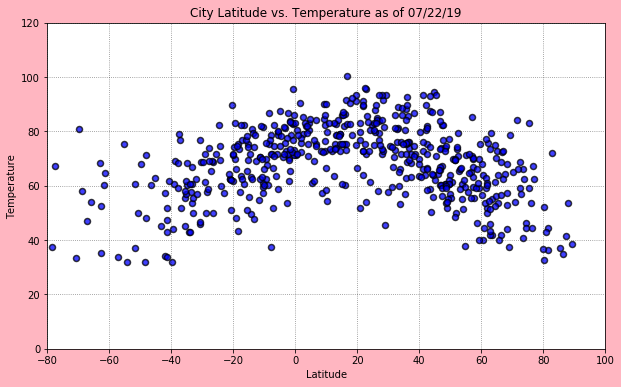

In [26]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightpink')

plt.scatter(city_weather_df["lat"], city_weather_df["temp"], color="Blue", edgecolor = 'black',alpha=.75,linewidths=1.5)

plt.title("City Latitude vs. Temperature as of " + datetime.now().strftime('%m/%d/%y'))
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(-80,100)
plt.ylim(0,120)
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)


#### Latitude vs. Humidity Plot

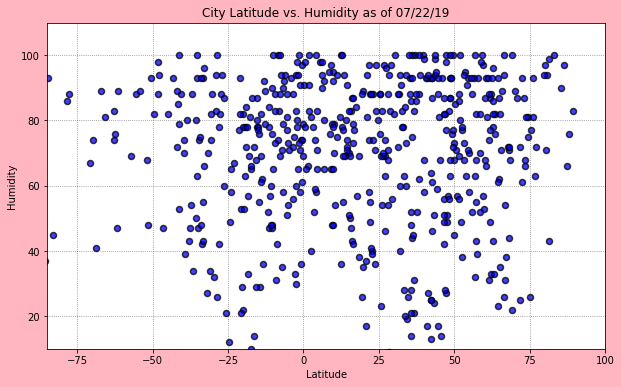

In [28]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightpink')

plt.scatter(city_weather_df["lat"], city_weather_df["humi"], color="Blue", edgecolor = 'black',alpha=.75,linewidths=1.5)

plt.title("City Latitude vs. Humidity as of " + datetime.now().strftime('%m/%d/%y'))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-85, 100)
plt.ylim(10,110)
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)


#### Latitude vs. Cloudiness Plot

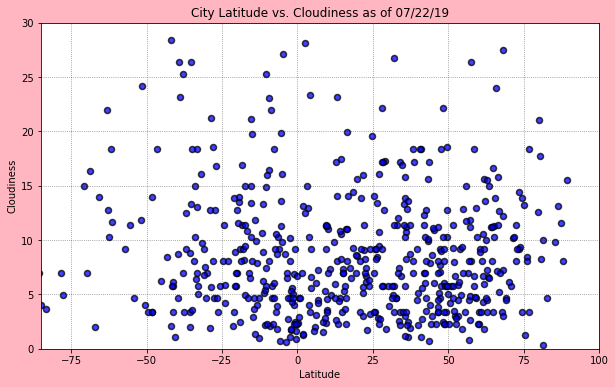

In [30]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightpink')

plt.scatter(city_weather_df["lat"], city_weather_df["cloud"], color="Blue", edgecolor = 'black',alpha=.75,linewidths=1.5)

plt.title("City Latitude vs. Cloudiness as of " + datetime.now().strftime('%m/%d/%y'))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-85, 100)
plt.ylim(0,30)
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)


#### Latitude vs. Wind Speed Plot

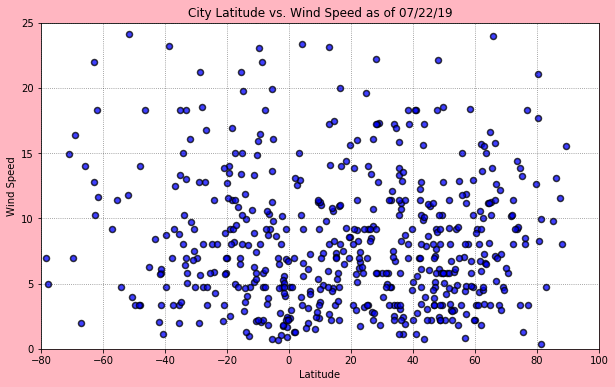

In [32]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightpink')

plt.scatter(city_weather_df["lat"], city_weather_df["cloud"], color="Blue", edgecolor = 'black',alpha=.75,linewidths=1.5)

plt.title("City Latitude vs. Wind Speed as of " + datetime.now().strftime('%m/%d/%y'))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-80, 100)
plt.ylim(0,25)
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
